In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axis3d import Axis
%matplotlib inline

In [2]:
X = np.random.rand(10000,3)*2
X -= X.mean(axis=0)
    
R = np.sqrt( np.sum(X**2, axis=1) )
mask = (R < .2) | ( (R > .8) & (R < 1) )

y = np.zeros(X.shape[0])
y[(R > .8) & (R < 1)] = 1
y = y[mask]

X = X[mask, : ]

X.shape

(2603, 3)

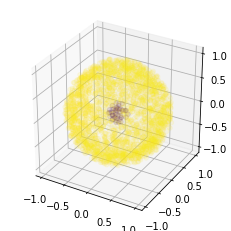

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=.1, c=y)
ax.set_aspect(1)

In [4]:
# class model(nn.Module):
    
#     def __init__(self):
#         super().__init__()
#         self.layers = {
#             1: nn.Dropout(.5),
#             2: nn.Linear(3,2),
#             3: nn.Tanh(),
#             4: nn.Linear(2,3),
#             5: nn.Tanh()
#         }
        
#     def forward(self,x):
#         for layer in self.layers:
#             x = layer(x)
#         return x
    
#     def predict(self,x):
#         x = self.layers[2](x)
#         x = self.layers[3](x)

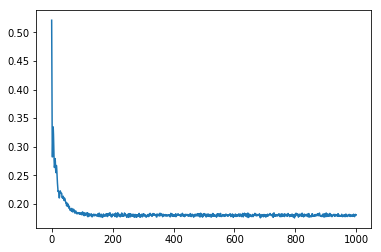

In [5]:
X = torch.Tensor(X)

model = nn.Sequential(
#     nn.Dropout(.5),
    nn.Linear(3,2),
    nn.Tanh(),
    nn.Linear(2,3),
    nn.Tanh(),
)

loss_fn = nn.MSELoss()

optimizer = torch.optim.RMSprop(
    model.parameters(),
    lr = 1e-2,
    momentum = 0.9
)

epochs = int(1e3)
LOSS = np.zeros(epochs)

for epoch in range(epochs):
    
    yhat = model(X)
    
    loss = loss_fn(yhat,X)
    LOSS[epoch] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
plt.plot(LOSS)

In [6]:
model[1:3]

Sequential(
  (1): Linear(in_features=3, out_features=2, bias=True)
  (2): Tanh()
)

In [7]:
xhat = model[1:3](X)
xhat = xhat.detach().numpy()
xhat.shape

(2603, 2)

[]

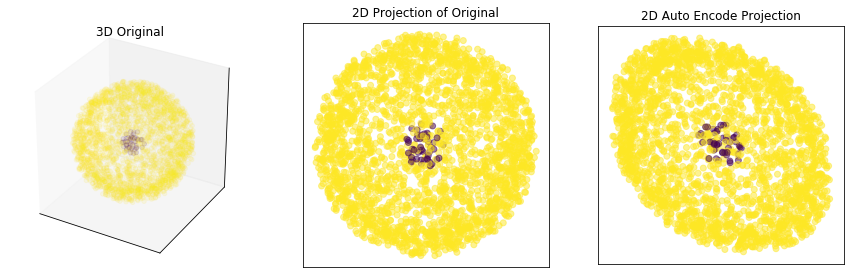

In [8]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:,0], X[:,1], X[:,2], alpha=.1, c=y)
ax1.set_aspect(1)
ax1.set_title("3D Original")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])

ax2 = fig.add_subplot(132)
ax2.scatter(X[:,0],X[:,1], c=y, alpha=.5)
ax2.set_aspect(1)
ax2.set_title("2D Projection of Original")
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(133)
ax3.scatter(xhat[:,0],xhat[:,1], c=y, alpha=.5)
ax3.set_aspect(1)
ax3.set_title("2D Auto Encode Projection")
ax3.set_xticks([])
ax3.set_yticks([])